In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [11]:
ss = StandardScaler()
scaled_data = ss.fit_transform(data)

In [13]:
scaled_data

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -6.87681906e-01, -1.62950241e+00,  1.45416070e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
        -6.87681906e-01, -1.60369074e+00,  1.45416070e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         1.45416070e+00, -1.59078490e+00,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -6.87681906e-01,  1.90669738e+00, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         1.45416070e+00,  1.93250906e+00, -6.87681906e-01],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         1.45416070e+00,  1.99703825e+00, -6.87681906e-01]])

In [3]:
y = data.iloc[:,-1]
X = data.iloc[:,:-1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
xtc = ExtraTreesClassifier()
svm = LinearSVC()
skf = StratifiedKFold()

In [8]:
def recursive_elimination(est):
    selector = RFECV(
        est,
        step=1,
        cv = skf
    )
    selector.fit(
        X_train,
        y_train
    )
    plt.figure(figsize=(16,7))
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
    plt.show()
    mask = selector.get_support()
    print('Optimal number of features is: {}'.format(selector.n_features_))
    print('Best features are: {}'.format(X.columns[selector.support_].to_list()))    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

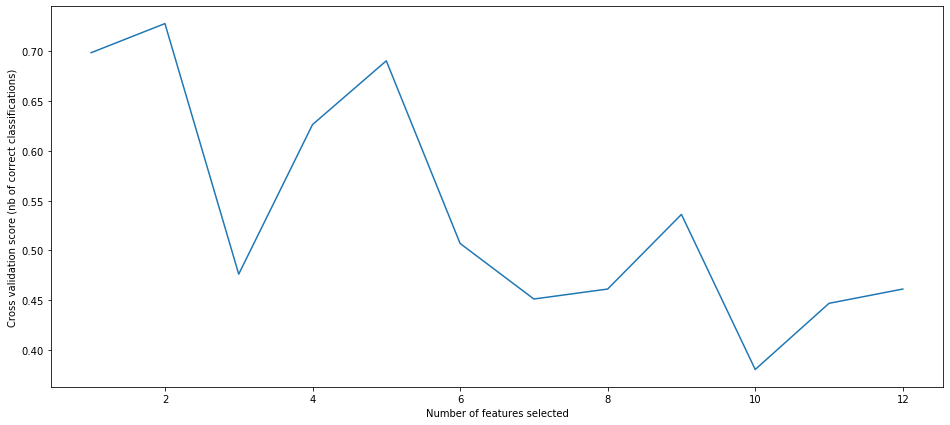

Optimal number of features is: 2
Best features are: ['ejection_fraction', 'serum_creatinine']


In [9]:
recursive_elimination(svc)